In [1]:
import torch
from PIL import Image


/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'1.12.0'

In [16]:
import pandas as pd
import os
# frame = "data/extracted-train-frames/content/work/frames/train/58517_003494_Endzone.mp4_0512.jpg"
# Image.open(frame)

# train_labels = pd.read_csv("data/train_labels.csv")
# baseline_helmets = pd.read_csv("data/train_baseline_helmets.csv")
baseline_helmets = pd.read_csv("data/train_baseline_helmets.csv")

In [64]:
baseline_helmets.head()

,game_play,game_key,play_id,view,video,frame,nfl_player_id,player_label,left,width,top,height
0,58168_003392,58168,3392,Endzone,58168_003392_Endzone.mp4,290,39947,H72,946,25,293,34
1,58168_003392,58168,3392,Endzone,58168_003392_Endzone.mp4,290,37211,H42,151,25,267,33
2,58168_003392,58168,3392,Endzone,58168_003392_Endzone.mp4,290,38590,H70,810,25,293,35
3,58168_003392,58168,3392,Endzone,58168_003392_Endzone.mp4,290,44822,H15,681,26,254,33
4,58168_003392,58168,3392,Endzone,58168_003392_Endzone.mp4,290,41944,V92,680,23,303,33


In [63]:
train_labels["frame"] =train_labels["step"]/10*59.95+5*59.95
train_labels["frame"] = train_labels["frame"].astype(int)
train_labels[train_labels['contact']==1].head()

,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact,frame
809,58168_003392_3_41944_42565,58168_003392,2020-09-11T03:01:48.400Z,3,41944,42565,1,317
1062,58168_003392_4_41944_42565,58168_003392,2020-09-11T03:01:48.500Z,4,41944,42565,1,323
1163,58168_003392_4_37084_38567,58168_003392,2020-09-11T03:01:48.500Z,4,37084,38567,1,323
1289,58168_003392_5_43854_46445,58168_003392,2020-09-11T03:01:48.600Z,5,43854,46445,1,329
1315,58168_003392_5_41944_42565,58168_003392,2020-09-11T03:01:48.600Z,5,41944,42565,1,329


game_play                    58168_003392
game_key                            58168
play_id                              3392
view                              Endzone
video            58168_003392_Endzone.mp4
frame                                 329
nfl_player_id                       41944
player_label                          V92
left                                  606
width                                  20
top                                   288
height                                 13
Name: 1653, dtype: object
58168_003392_Endzone.mp4_329.jpg


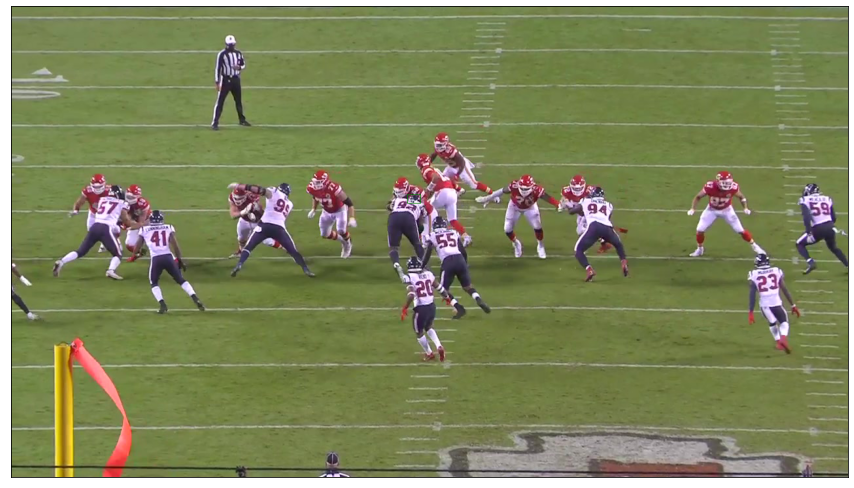

In [72]:
import random
from torchvision.utils import draw_bounding_boxes
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import numpy as np
from torchvision.io import read_image

idx = random.randint(0, baseline_helmets.shape[0])
idx =99
# record = baseline_helmets[(baseline_helmets['game_play']=='58579_003527')&
# (baseline_helmets['view']=='Sideline')&(baseline_helmets['frame']==775)].iloc[2]
record = baseline_helmets[(baseline_helmets['game_play']=='58168_003392')&
(baseline_helmets['nfl_player_id']==41944)&(baseline_helmets['frame']==329)].iloc[0]
print(record)
frame = int(record["frame"])
ymin = record["top"]
xmin = record["left"]
height = record["height"]
width = record["width"]

xmax = xmin+width
ymax = ymin+height

file_name = record['game_play']+"_" + record['view'] +".mp4_{:03d}.jpg".format(frame)
print(file_name)
file_name ="58579_003527_Sideline.mp4_0775.jpg"
file_name ="58168_003392_Endzone.mp4_0329.jpg"

image = read_image("data/extracted-train-frames/content/work/frames/train/"+file_name)
boxes = torch.tensor([[xmin,ymin,xmax,ymax]])



def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False,figsize=(15, 15))
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

drawn_boxes = draw_bounding_boxes(image, boxes, colors="green")
show(drawn_boxes)
    # inflating: extracted-train-frames/content/work/frames/train/58579_003527_Sideline.mp4_0775.jpg  

In [ ]:
  inflating: extracted-train-frames/content/work/frames/train/58537_000757_Endzone.mp4_0278.jpg  


In [14]:
train_labels.iloc[1]['nfl_player_id_1']
train_labels.head()

,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact
0,58168_003392_0_38590_43854,58168_003392,2020-09-11T03:01:48.100Z,0,38590,43854,0
1,58168_003392_0_38590_41257,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41257,0
2,58168_003392_0_38590_41944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41944,0
3,58168_003392_0_38590_42386,58168_003392,2020-09-11T03:01:48.100Z,0,38590,42386,0
4,58168_003392_0_38590_47944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,47944,0


In [4]:
from torch.utils.data import DataLoader, Dataset
import os

299

In [ ]:
class NFLContactDataset(Dataset):
    def __init__(self, root, transforms= None):
        self.root = root
        self.transforms = transforms
        self.train_labels = pd.read_csv(os.path.join(root, "train_labels.csv"))
        
        # frame = int(step/10*59.95+5*59.95)